In [1]:
display(HTML("<style>.rendered_html.text_cell_render {max-width:700px; }</style>"));
push!(LOAD_PATH, "src");

HTML{String}("<style>.rendered_html.text_cell_render {max-width:700px; }</style>")

In [2]:
include("src/pose2d.jl")

In [3]:
#nbx --fname=src/measurements.jl
using Colors, Plots
col = palette(:default);
using MyUtils
using LinearAlgebra: norm

In [4]:
#nbx
"""
    Measurement(z,a)

Depth measurement in a specified direction.
"""
mutable struct Measurement
    z::Float64
    a::Float64
end
Measurement(x::Vector{Float64}) = Measurement(norm(x), atan(x[2],x[1]));
tuple(s::Measurement) = (z,a);
depth(s::Measurement) = s.z;
MyUtils.angle(s::Measurement) = s.a;
MyUtils.euclidean(s::Measurement) = [s.z*cos(s.a); s.z*sin(s.a)];
MyUtils.polar(s::Measurement) = [s.z;s.a]
vector(s::Measurement) = [s.z*cos(s.a); s.z*sin(s.a)];
vec(s::Measurement)    = [s.z*cos(s.a); s.z*sin(s.a)];
Base.:(*)(s::Measurement, p::Pose) = vector(s) * p;

export Measurement, depth, dir, vector, vec, depth, angle

In [9]:
#nbx
function Plots.scatter!(p::Pose, ss::Vector{Measurement}; args...)
    xs = vector.(ss) .* p 
    xs = stack(xs)
    scatter!(xs[:,1], xs[:,2]; label=nothing, args...)
end

Plots.scatter!(ss::Vector{Measurement}, p::Pose; args...) = scatter!(p,ss; args...)
Plots.scatter!(ss::Vector{Measurement}; args...) = scatter!(Pose(), ss;args)

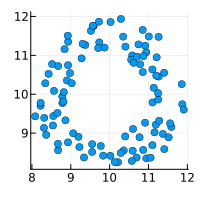

In [10]:
ss = [Measurement(rand() + 1, rand()*2π) for t=1:1_00]
p  = Pose([10,10], π)
# -------------------------
plot(size=(200,200), aspect_ratio=:equal)
scatter!(p, ss)

In [11]:
Tuple{Int}

Tuple{Int64}